In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wifi_localization.csv to wifi_localization.csv


In [ ]:
import numpy as np
import pandas as pd
#Loading Dataset
data = pd.read_csv("wifi_localization.csv")
data

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,class
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [ ]:
x=data.iloc[:,0:7].values
x

In [ ]:
y=data.iloc[:,7].values
y

array([1, 1, 1, ..., 4, 4, 4])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train)
dtree_predictions = dtree_model.predict(x_test)
  

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dtree_predictions,y_test)*100

91.75

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, dtree_predictions)
cm

array([[107,   0,   0,   0],
       [  0,  83,  10,   0],
       [  1,  13,  86,   1],
       [  1,   0,   7,  91]])

In [ ]:
dtree_model.predict([[-82,-82,-66,-96,-55,-58,-77]])

array([1])

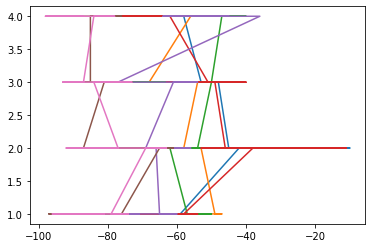

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y)